# 葡萄酒质量预测

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/winequality-data.csv')
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [3]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489,2939.500000
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364,1131.173506
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000,981.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000,1960.250000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000,2939.500000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000,3918.750000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000,4898.000000


fixed acidity：非挥发性酸   

volatile acidity ： 挥发性酸  

citric acid：柠檬酸

residual sugar ：剩余糖分

chlorides：氯化物

free sulfur dioxide ：游离二氧化硫

total sulfur dioxide：总二氧化硫

density：密度

pH：pH

sulphates：硫酸盐

alcohol：酒精

quality：质量

所有数据的数值为1599，所以没有缺失值。让我们看看是否有重复值：


In [4]:
extra = data[data.duplicated()]
extra.shape

(0, 13)

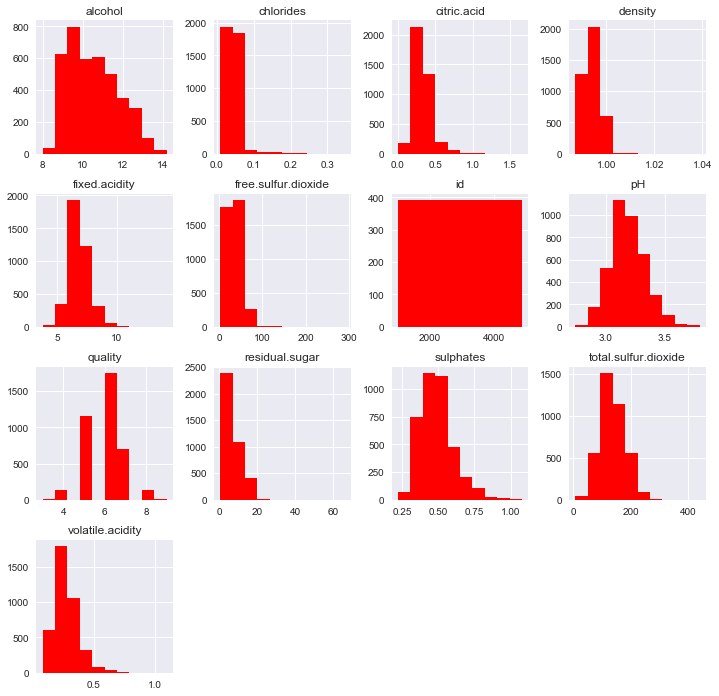

In [6]:
sns.set()
data.hist(figsize=(12,12), color='red')
plt.show()

只有质量是离散型变量，主要集中在5和6中，下面分析下变量的相关性：

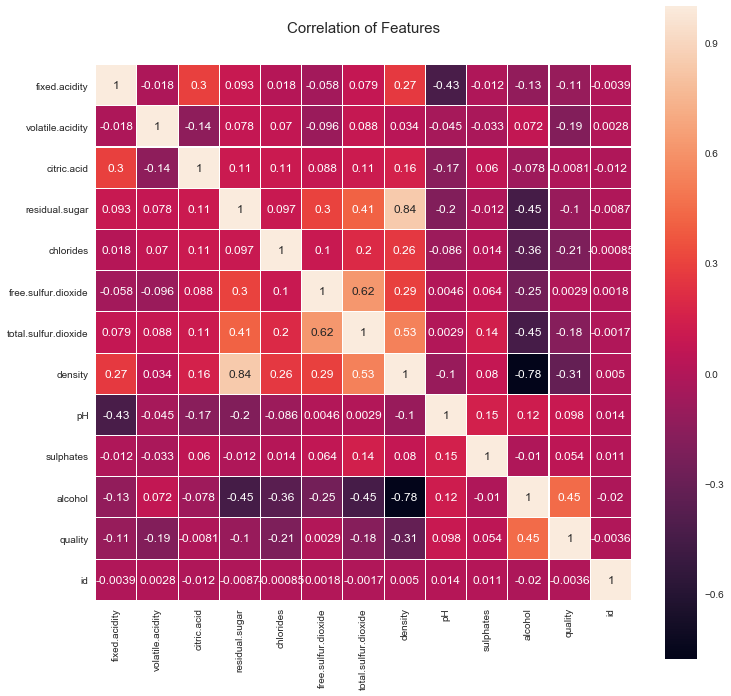

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

观察:
酒精与葡萄酒质量的相关性最高，其次是各种酸度、硫酸盐、密度和氯化物。

使用分类器：

将葡萄酒分成两组;“优质”>5为“好酒”

In [8]:
y = data.quality                  # set 'quality' as target
X = data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)           # check correctness

(3918,) (3918, 12)


In [9]:
# Create a new y1
y1 = (y > 5).astype(int)
y1.head()

0    1
1    1
2    0
3    1
4    0
Name: quality, dtype: int32

Text(0.5,0,'aggregated target value')

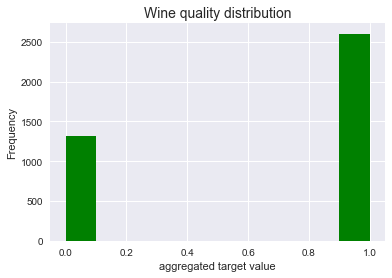

In [10]:
# plot histogram
ax = y1.plot.hist(color='green')
ax.set_title('Wine quality distribution', fontsize=14)
ax.set_xlabel('aggregated target value')

利用随机森林分类器训练预测模型

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

将数据分割为训练和测试数据集

In [13]:
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3134, 12) (784, 12) (3134,) (784,)


对随机森林分类器进行交叉验证训练和评价

In [14]:
# Instantiate the Random Forest Classifier
RF_clf = RandomForestClassifier(random_state=seed)
RF_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [15]:
# 在训练数据集上计算k-fold交叉验证，并查看平均精度得分
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

The accuracy scores for the iterations are [0.80952381 0.78412698 0.77316294 0.77635783 0.76677316 0.80191693
 0.81469649 0.77316294 0.75079872 0.79233227]
The mean accuracy score is 0.7842852071606066


执行预测

In [18]:
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)

In [19]:
# Print 10 results to see
for i in range(0,10):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_RF[i])

Actual wine quality is  0  and predicted is  1
Actual wine quality is  1  and predicted is  1
Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  0
Actual wine quality is  1  and predicted is  1
Actual wine quality is  1  and predicted is  1
Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  1
Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  1


10个样本里面有3个错误，看看指标

In [22]:
print(accuracy_score(y_test, pred_RF))
print(log_loss(y_test, pred_RF))
print(confusion_matrix(y_test, pred_RF))

0.7908163265306123
7.225037874157154
[[184  88]
 [ 76 436]]


让我们调优随机森林分类器的超参数

In [24]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_RF = GridSearchCV(RF_clf,param_grid=grid_values,scoring='accuracy')
grid_RF.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 30, 15, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
grid_RF.best_params_

除了估计数之外，其他推荐值是默认值。

In [ ]:
RF_clf = RandomForestClassifier(n_estimators=100,random_state=seed)
RF_clf.fit(X_train,y_train)
pred_RF = RF_clf.predict(X_test)
print(accuracy_score(y_test,pred_RF))
print(log_loss(y_test,pred_RF))

In [ ]:
print(confusion_matrix(y_test,pred_RF))

通过超参数调谐，射频分类器的准确度已提高到82.5%，日志损失值也相应降低。分类错误的数量也减少到56个。

将随机森林分类器作为基本推荐器，将红酒分为“推荐”(6级以上)或“不推荐”(5级以下)，预测准确率为82.5%似乎是合理的。